In [285]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import time

In [287]:
Netflix = pd.read_csv("/content/drive/MyDrive/paprika/ViewingActivity.csv")
Netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)"
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)"
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)"
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)"
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)"


In [288]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19161 entries, 0 to 19160
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             19161 non-null  object
 1   Start Time               19161 non-null  object
 2   Duration                 19161 non-null  object
 3   Attributes               8441 non-null   object
 4   Title                    19161 non-null  object
 5   Supplemental Video Type  3810 non-null   object
 6   Device Type              19160 non-null  object
 7   Bookmark                 19161 non-null  object
 8   Latest Bookmark          19161 non-null  object
 9   Country                  19161 non-null  object
dtypes: object(10)
memory usage: 1.5+ MB


## Start Time을 DateTime type으로 바꾸기

In [289]:
Netflix["Start Time"] = pd.to_datetime(Netflix["Start Time"])

In [290]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19161 entries, 0 to 19160
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Profile Name             19161 non-null  object        
 1   Start Time               19161 non-null  datetime64[ns]
 2   Duration                 19161 non-null  object        
 3   Attributes               8441 non-null   object        
 4   Title                    19161 non-null  object        
 5   Supplemental Video Type  3810 non-null   object        
 6   Device Type              19160 non-null  object        
 7   Bookmark                 19161 non-null  object        
 8   Latest Bookmark          19161 non-null  object        
 9   Country                  19161 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 1.5+ MB


## 날짜 분리
연도 / 월 / 일 / 요일

In [291]:
Netflix["Year"] = Netflix["Start Time"].dt.year
Netflix["Month"] = Netflix["Start Time"].dt.month
Netflix["Day"] = Netflix["Start Time"].dt.day
Netflix["Day_name"] = Netflix["Start Time"].dt.day_name()
Netflix

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Day_name
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",2021,5,31,Monday
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",2021,5,30,Sunday
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",2021,5,30,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday
19157,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday
19158,김지은,2019-02-09 04:08:47,00:00:18,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:23,00:00:23,"KR (Korea, Republic of)",2019,2,9,Saturday
19159,김지은,2019-02-09 03:10:57,00:00:11,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Apple iPhone X (GSM),00:00:11,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday


## 시간 분리
시 / 분 / 초

In [292]:
Netflix["Hour"] = Netflix["Start Time"].dt.hour
Netflix["Minute"] = Netflix["Start Time"].dt.minute
Netflix["Second"] = Netflix["Start Time"].dt.second
Netflix

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Day_name,Hour,Minute,Second
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",2021,5,31,Monday,2,25,20
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,38
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,20
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",2021,5,30,Sunday,14,6,8
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",2021,5,30,Sunday,14,5,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,4,25,19
19157,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,4,20,35
19158,김지은,2019-02-09 04:08:47,00:00:18,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:23,00:00:23,"KR (Korea, Republic of)",2019,2,9,Saturday,4,8,47
19159,김지은,2019-02-09 03:10:57,00:00:11,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Apple iPhone X (GSM),00:00:11,Not latest view,"KR (Korea, Republic of)",2019,2,9,Saturday,3,10,57


# 1. 요일 별 시청 시간(movie, drama 합쳐서)(중복값 제거 X)

요일별로 duration 합치기

선형그래프

In [293]:
day_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [294]:
Netflix["Duration_hour"] = Netflix['Duration'].apply(lambda x : x.split(':')[0])
Netflix["Duration_min"] = Netflix['Duration'].apply(lambda x : x.split(':')[1])
Netflix["Duration_sec"] = Netflix['Duration'].apply(lambda x : x.split(':')[2])
Netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Year,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",2021,5,31,Monday,2,25,20,00,00,05
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,38,00,00,04
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",2021,5,30,Sunday,14,8,20,00,00,04
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",2021,5,30,Sunday,14,6,8,00,01,54
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",2021,5,30,Sunday,14,5,48,00,00,17


In [295]:
Netflix['Duration_sec_sum'] = Netflix["Duration_sec"].map(int) + Netflix["Duration_min"].apply(lambda x : int(x)*60) + Netflix["Duration_hour"].apply(lambda x : int(x)*60)
Netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",...,5,31,Monday,2,25,20,00,00,05,5
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",...,5,30,Sunday,14,8,38,00,00,04,4
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",...,5,30,Sunday,14,8,20,00,00,04,4
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",...,5,30,Sunday,14,6,8,00,01,54,114
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",...,5,30,Sunday,14,5,48,00,00,17,17


### duration 초(시간단위)로 바꾸기

In [296]:
Duration_seconds_sum = Netflix.groupby(["Day_name"])['Duration_sec_sum'].sum()
Duration_seconds_sum

Day_name
Friday       1887486
Monday       1412542
Saturday     2973857
Sunday       2585885
Thursday     1712603
Tuesday      1679127
Wednesday    1606501
Name: Duration_sec_sum, dtype: int64

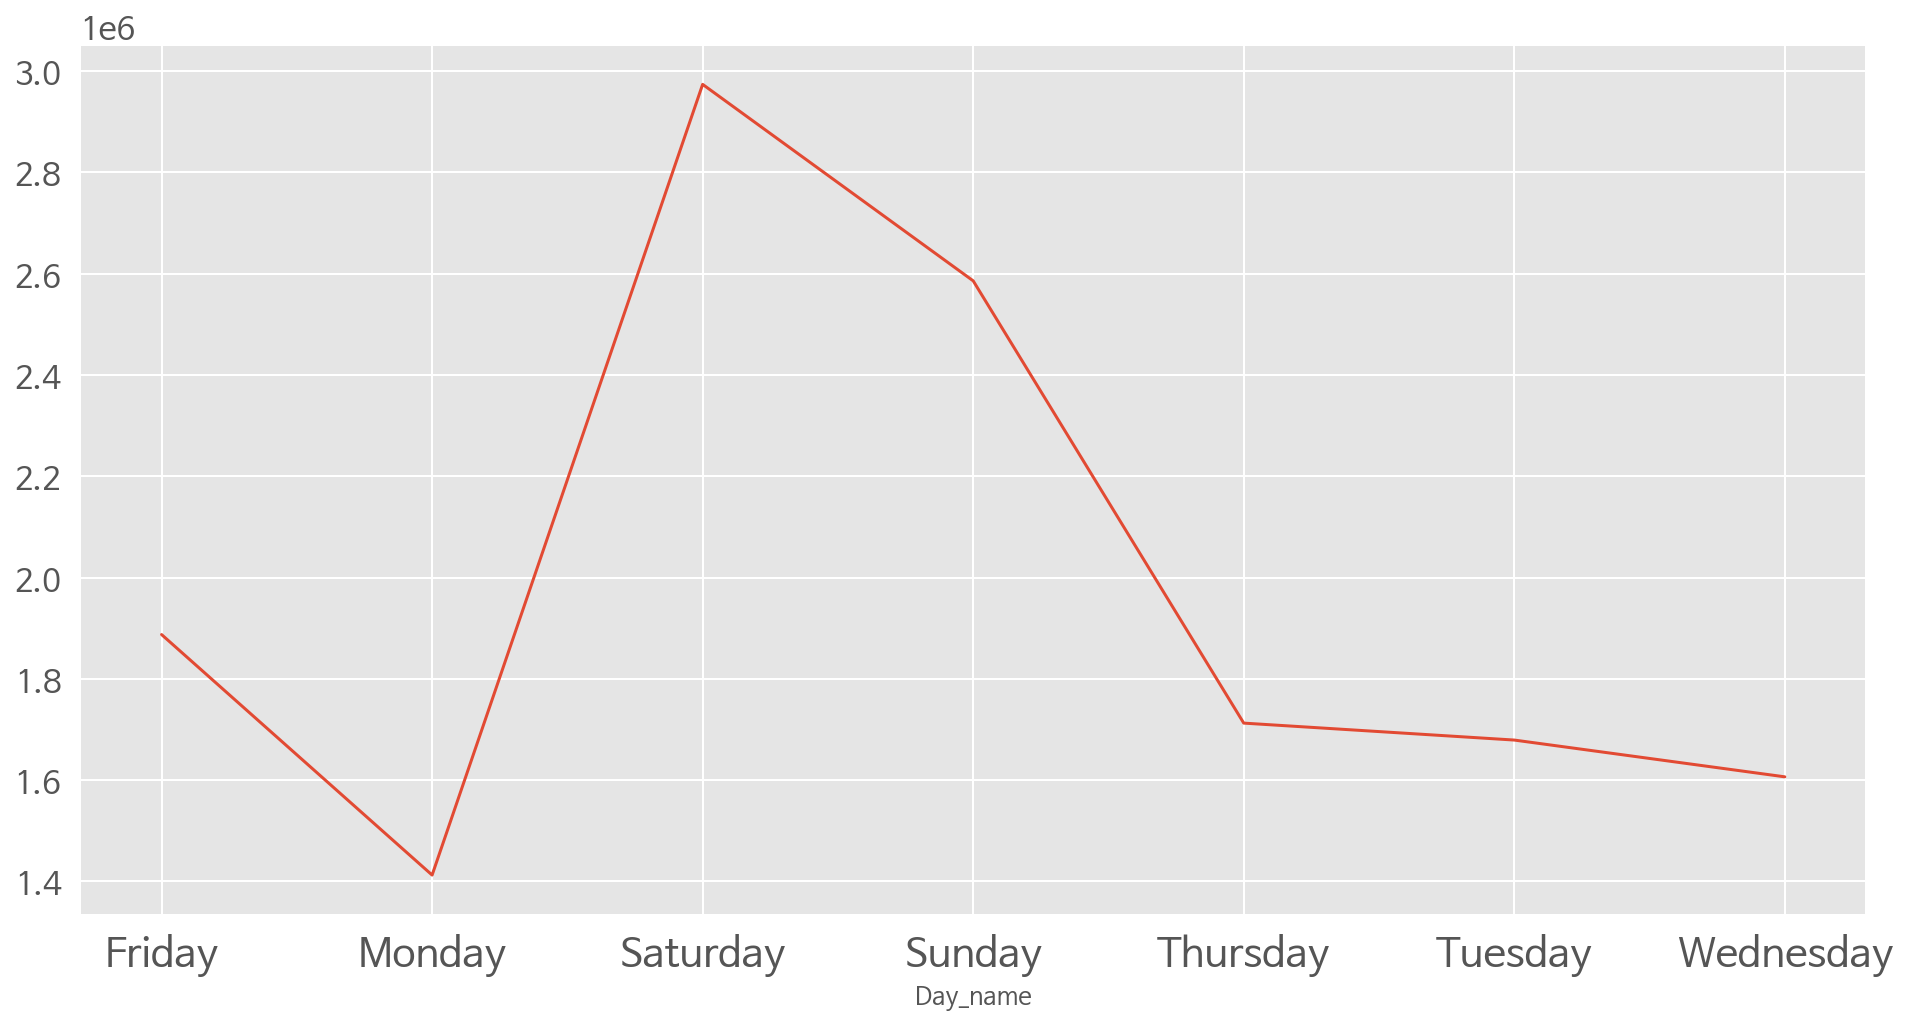

In [297]:
plt.figure(figsize=(16, 8))
Duration_seconds_sum.plot()

### duration 분(시간단위)로 바꾸기

In [298]:
Duration_min_sum = round(Netflix.groupby(["Day_name"])['Duration_sec_sum'].sum()/60,2)
Duration_min_sum

Day_name
Friday       31458.10
Monday       23542.37
Saturday     49564.28
Sunday       43098.08
Thursday     28543.38
Tuesday      27985.45
Wednesday    26775.02
Name: Duration_sec_sum, dtype: float64

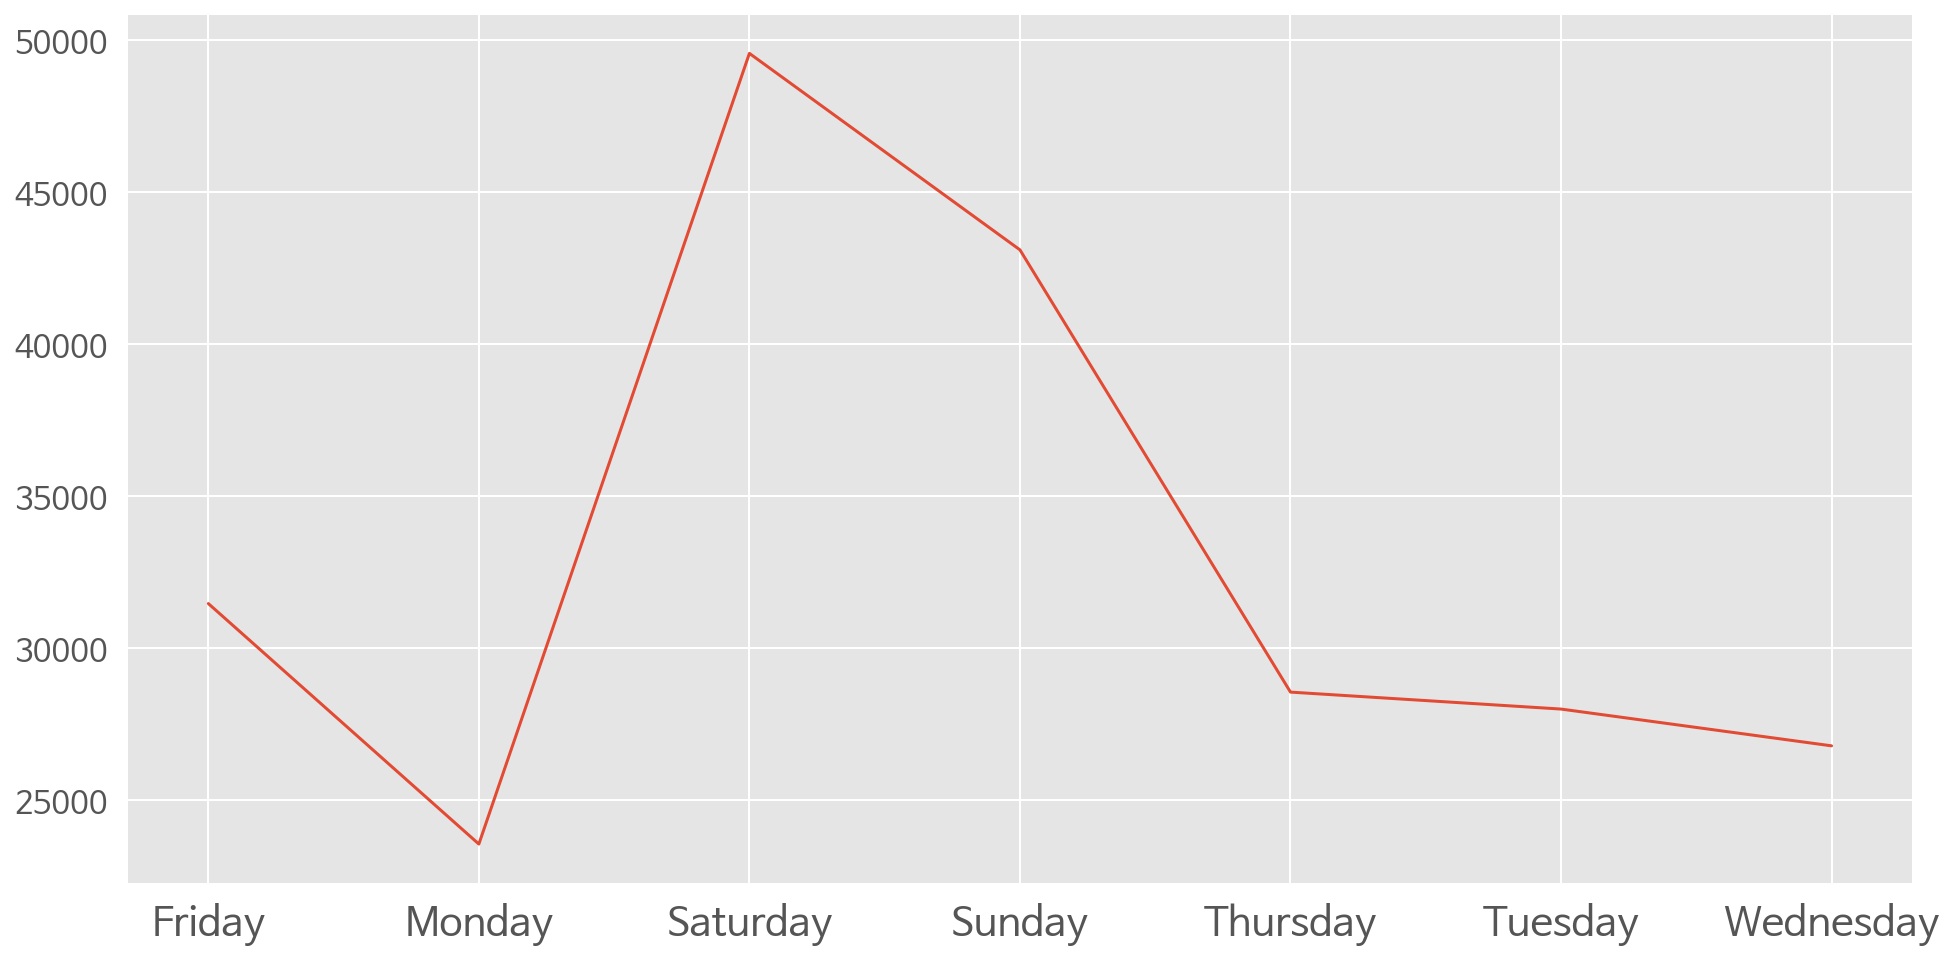

In [299]:
plt.figure(figsize=(16, 8))
plt.plot(Duration_min_sum)

### duration 시(시간단위)로 바꾸기

In [300]:
Duration_hour_sum = round(Netflix.groupby(["Day_name"])['Duration_sec_sum'].sum()/3600,2)
Duration_hour_sum

Day_name
Friday       524.30
Monday       392.37
Saturday     826.07
Sunday       718.30
Thursday     475.72
Tuesday      466.42
Wednesday    446.25
Name: Duration_sec_sum, dtype: float64

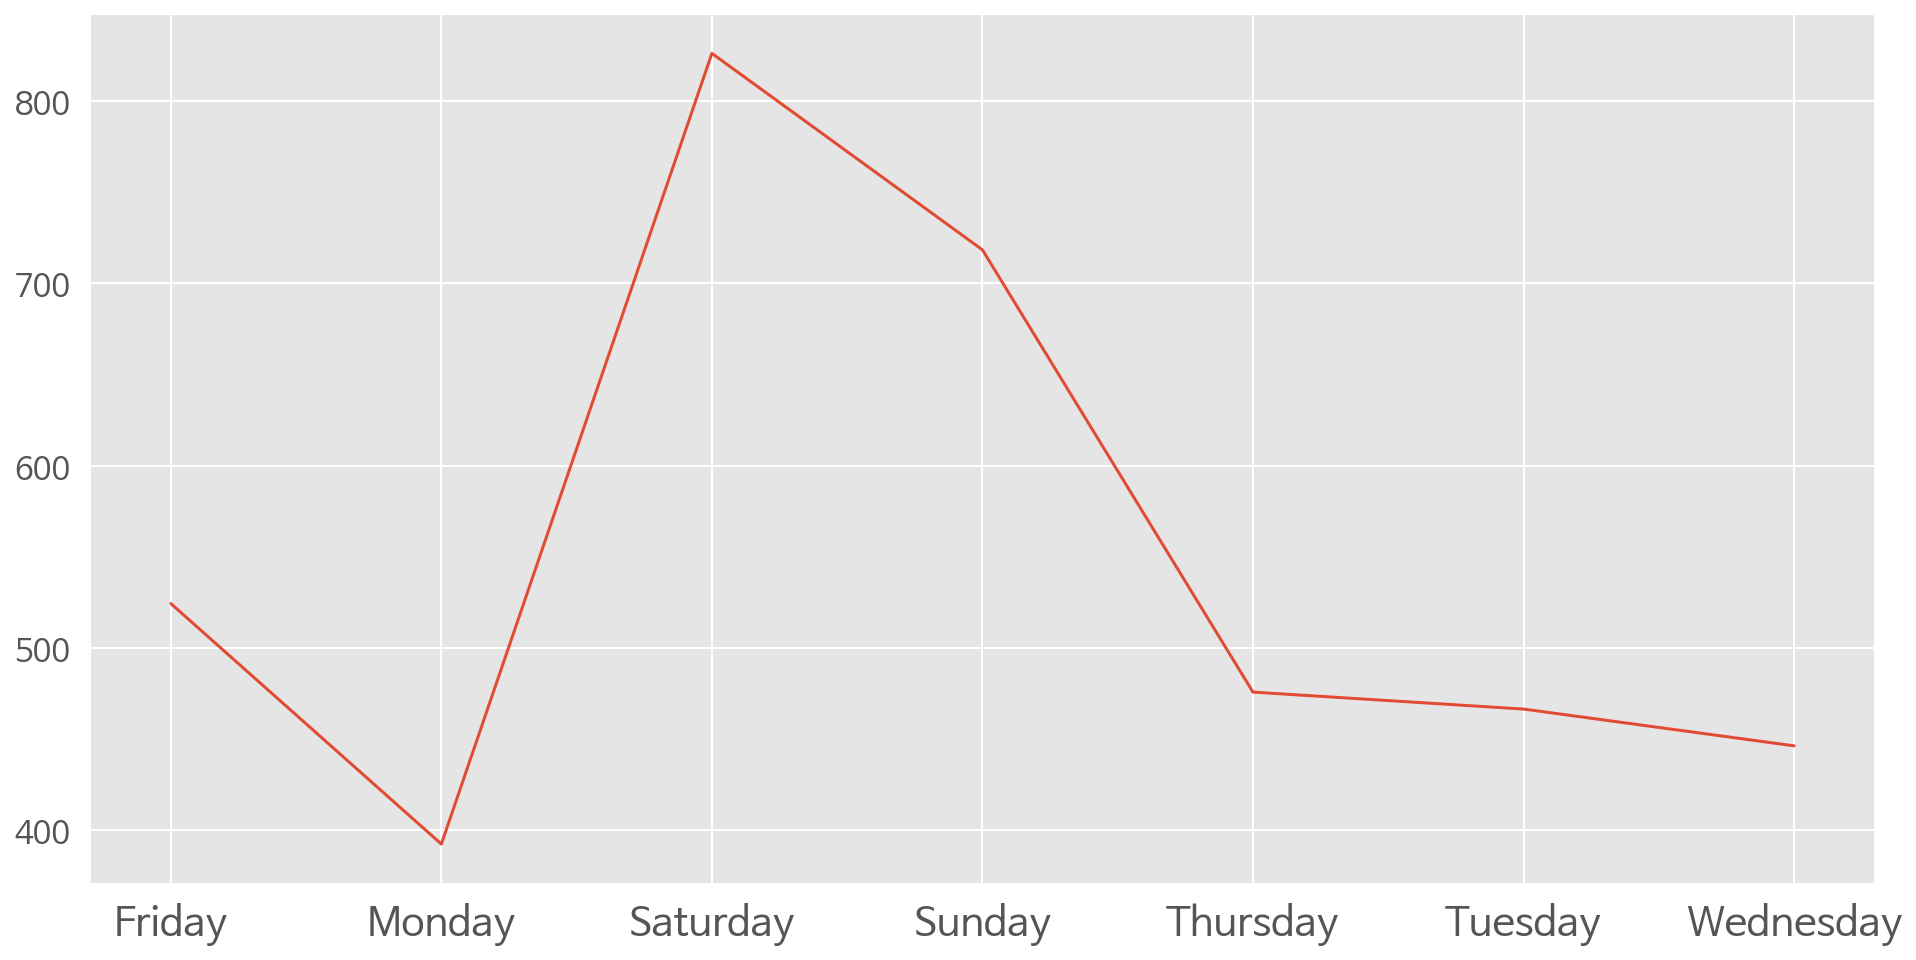

In [301]:
plt.figure(figsize=(16, 8))
plt.plot(Duration_hour_sum)

# 2. 가장 많은 시간을 소비한 TV 시리즈 Top5의 각 소요 시간의 합
bar chart

In [302]:
Netflix

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",...,5,31,Monday,2,25,20,00,00,05,5
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",...,5,30,Sunday,14,8,38,00,00,04,4
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",...,5,30,Sunday,14,8,20,00,00,04,4
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",...,5,30,Sunday,14,6,8,00,01,54,114
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",...,5,30,Sunday,14,5,48,00,00,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,4,25,19,00,00,23,23
19157,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,4,20,35,00,00,57,57
19158,김지은,2019-02-09 04:08:47,00:00:18,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:23,00:00:23,"KR (Korea, Republic of)",...,2,9,Saturday,4,8,47,00,00,18,18
19159,김지은,2019-02-09 03:10:57,00:00:11,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Apple iPhone X (GSM),00:00:11,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,3,10,57,00,00,11,11


In [303]:
Drama = Netflix.loc[Netflix["Title"].str.contains(':')]
Drama

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",...,5,31,Monday,2,25,20,00,00,05,5
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",...,5,30,Sunday,14,6,8,00,01,54,114
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",...,5,30,Sunday,14,5,48,00,00,17,17
6,guest,2021-05-30 14:05:01,00:00:07,Autoplayed: user action: None;,Nothing But Thirty: Season 1_hook_01_16x9,HOOK,Safari MAC (Cadmium),00:00:07,00:00:07,"KR (Korea, Republic of)",...,5,30,Sunday,14,5,1,00,00,07,7
10,guest,2021-05-30 11:21:17,00:01:31,Autoplayed: user action: None;,우주를 누비는 쏙독새: 시즌 1 (예고편),TRAILER,Safari MAC (Cadmium),00:01:32,00:01:32,"KR (Korea, Republic of)",...,5,30,Sunday,11,21,17,00,01,31,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,4,25,19,00,00,23,23
19157,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,4,20,35,00,00,57,57
19158,김지은,2019-02-09 04:08:47,00:00:18,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:23,00:00:23,"KR (Korea, Republic of)",...,2,9,Saturday,4,8,47,00,00,18,18
19159,김지은,2019-02-09 03:10:57,00:00:11,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Apple iPhone X (GSM),00:00:11,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,3,10,57,00,00,11,11


## 예고편 제거

In [304]:
# pd.set_option('display.max_rows',None)

In [305]:
Drama["Supplemental Video Type"].unique()

array(['HOOK', nan, 'TRAILER', 'TEASER_TRAILER', 'PREVIEW', 'RECAP',
       'CINEMAGRAPH', 'PROMOTIONAL', 'TUTORIAL'], dtype=object)

In [306]:
re_Drama = Drama.loc[Drama["Supplemental Video Type"].isnull()]
re_Drama = re_Drama.reset_index(drop=True)
re_Drama

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
0,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",...,5,30,Sunday,14,6,8,00,01,54,114
1,guest,2020-09-28 08:51:09,00:41:18,Autoplayed: user action: None;,슬기로운 의사생활: 시즌 1: 5화 (5화),NaN,Safari MAC (Cadmium),00:41:28,00:41:28,"KR (Korea, Republic of)",...,9,28,Monday,8,51,9,00,41,18,2478
2,guest,2020-09-28 07:54:05,00:57:03,NaN,슬기로운 의사생활: 시즌 1: 4화 (4화),NaN,Safari MAC (Cadmium),01:19:17,01:19:17,"KR (Korea, Republic of)",...,9,28,Monday,7,54,5,00,57,03,3423
3,guest,2020-09-26 18:16:04,00:03:18,NaN,슬기로운 의사생활: 시즌 1: 4화 (4화),NaN,Safari MAC (Cadmium),00:22:15,Not latest view,"KR (Korea, Republic of)",...,9,26,Saturday,18,16,4,00,03,18,198
4,guest,2020-09-26 17:20:56,00:18:46,Autoplayed: user action: None;,슬기로운 의사생활: 시즌 1: 4화 (4화),NaN,Safari MAC (Cadmium),00:18:56,Not latest view,"KR (Korea, Republic of)",...,9,26,Saturday,17,20,56,00,18,46,1126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13216,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,4,25,19,00,00,23,23
13217,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,4,20,35,00,00,57,57
13218,김지은,2019-02-09 04:08:47,00:00:18,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:23,00:00:23,"KR (Korea, Republic of)",...,2,9,Saturday,4,8,47,00,00,18,18
13219,김지은,2019-02-09 03:10:57,00:00:11,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Apple iPhone X (GSM),00:00:11,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,3,10,57,00,00,11,11


In [307]:
len(re_Drama)

13221

In [308]:
Title_list = list(re_Drama["Title"])
T_list = []
for i in range(len(Title_list)):
  T_list.append(Title_list[i].split(": "))

In [309]:
Title_df = pd.DataFrame(T_list, columns=["title","season", "episode", "episode2","episode3","episode4"])
Title_df

,title,season,episode,episode2,episode3,episode4
0,자객 오육칠,시즌 1,부자가 되는 법 (1화),None,None,None
1,슬기로운 의사생활,시즌 1,5화 (5화),None,None,None
2,슬기로운 의사생활,시즌 1,4화 (4화),None,None,None
3,슬기로운 의사생활,시즌 1,4화 (4화),None,None,None
4,슬기로운 의사생활,시즌 1,4화 (4화),None,None,None
...,...,...,...,...,...,...
13216,릭 앤 모티,시즌 1,파일럿 에피소드 (1화),None,None,None
13217,오티스의 비밀 상담소,시즌 1,1화 (1화),None,None,None
13218,킹덤,시즌 1,1화 (1화),None,None,None
13219,킹덤,시즌 1,1화 (1화),None,None,None


In [310]:
len(Title_df)

13221

In [311]:
title = pd.DataFrame(Title_df["title"])
title

,title
0,자객 오육칠
1,슬기로운 의사생활
2,슬기로운 의사생활
3,슬기로운 의사생활
4,슬기로운 의사생활
...,...
13216,릭 앤 모티
13217,오티스의 비밀 상담소
13218,킹덤
13219,킹덤


In [312]:
total_Drama = pd.concat([re_Drama,title], axis=1)
total_Drama.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum,title
0,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",...,30,Sunday,14,6,8,00,01,54,114,자객 오육칠
1,guest,2020-09-28 08:51:09,00:41:18,Autoplayed: user action: None;,슬기로운 의사생활: 시즌 1: 5화 (5화),NaN,Safari MAC (Cadmium),00:41:28,00:41:28,"KR (Korea, Republic of)",...,28,Monday,8,51,9,00,41,18,2478,슬기로운 의사생활
2,guest,2020-09-28 07:54:05,00:57:03,NaN,슬기로운 의사생활: 시즌 1: 4화 (4화),NaN,Safari MAC (Cadmium),01:19:17,01:19:17,"KR (Korea, Republic of)",...,28,Monday,7,54,5,00,57,03,3423,슬기로운 의사생활
3,guest,2020-09-26 18:16:04,00:03:18,NaN,슬기로운 의사생활: 시즌 1: 4화 (4화),NaN,Safari MAC (Cadmium),00:22:15,Not latest view,"KR (Korea, Republic of)",...,26,Saturday,18,16,4,00,03,18,198,슬기로운 의사생활
4,guest,2020-09-26 17:20:56,00:18:46,Autoplayed: user action: None;,슬기로운 의사생활: 시즌 1: 4화 (4화),NaN,Safari MAC (Cadmium),00:18:56,Not latest view,"KR (Korea, Republic of)",...,26,Saturday,17,20,56,00,18,46,1126,슬기로운 의사생활


In [313]:
len(total_Drama)

13221

## 같은 title의 duration 총합 구하기

In [314]:
total_Drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13221 entries, 0 to 13220
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Profile Name             13221 non-null  object        
 1   Start Time               13221 non-null  datetime64[ns]
 2   Duration                 13221 non-null  object        
 3   Attributes               4779 non-null   object        
 4   Title                    13221 non-null  object        
 5   Supplemental Video Type  0 non-null      object        
 6   Device Type              13221 non-null  object        
 7   Bookmark                 13221 non-null  object        
 8   Latest Bookmark          13221 non-null  object        
 9   Country                  13221 non-null  object        
 10  Year                     13221 non-null  int64         
 11  Month                    13221 non-null  int64         
 12  Day                      13221 n

In [315]:
total_Drama["Duration_hour"] = total_Drama["Duration_hour"].astype(int)
total_Drama["Duration_min"] = total_Drama["Duration_min"].astype(int)
total_Drama["Duration_sec"] = total_Drama["Duration_sec"].astype(int)

In [316]:
total_Drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13221 entries, 0 to 13220
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Profile Name             13221 non-null  object        
 1   Start Time               13221 non-null  datetime64[ns]
 2   Duration                 13221 non-null  object        
 3   Attributes               4779 non-null   object        
 4   Title                    13221 non-null  object        
 5   Supplemental Video Type  0 non-null      object        
 6   Device Type              13221 non-null  object        
 7   Bookmark                 13221 non-null  object        
 8   Latest Bookmark          13221 non-null  object        
 9   Country                  13221 non-null  object        
 10  Year                     13221 non-null  int64         
 11  Month                    13221 non-null  int64         
 12  Day                      13221 n

In [317]:
total_Drama["total_duration_sec"] = total_Drama["Duration_hour"]*3600 + total_Drama["Duration_min"]*60 + total_Drama["Duration_sec"]
total_Drama.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum,title,total_duration_sec
0,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",...,Sunday,14,6,8,0,1,54,114,자객 오육칠,114
1,guest,2020-09-28 08:51:09,00:41:18,Autoplayed: user action: None;,슬기로운 의사생활: 시즌 1: 5화 (5화),NaN,Safari MAC (Cadmium),00:41:28,00:41:28,"KR (Korea, Republic of)",...,Monday,8,51,9,0,41,18,2478,슬기로운 의사생활,2478
2,guest,2020-09-28 07:54:05,00:57:03,NaN,슬기로운 의사생활: 시즌 1: 4화 (4화),NaN,Safari MAC (Cadmium),01:19:17,01:19:17,"KR (Korea, Republic of)",...,Monday,7,54,5,0,57,3,3423,슬기로운 의사생활,3423
3,guest,2020-09-26 18:16:04,00:03:18,NaN,슬기로운 의사생활: 시즌 1: 4화 (4화),NaN,Safari MAC (Cadmium),00:22:15,Not latest view,"KR (Korea, Republic of)",...,Saturday,18,16,4,0,3,18,198,슬기로운 의사생활,198
4,guest,2020-09-26 17:20:56,00:18:46,Autoplayed: user action: None;,슬기로운 의사생활: 시즌 1: 4화 (4화),NaN,Safari MAC (Cadmium),00:18:56,Not latest view,"KR (Korea, Republic of)",...,Saturday,17,20,56,0,18,46,1126,슬기로운 의사생활,1126


In [318]:
group = total_Drama.groupby(total_Drama["title"])
group.size()

title
#캣츠                      1
100만 엔의 여인들             16
100인, 인간을 말하다            8
10대 사건으로 보는 제2차 세계대전    10
3D 그녀 리얼걸                1
                        ..
희생자 게임                   1
히든싱어                     4
히스토리 101                 3
힐다                      23
힘쎈 여자 도봉순                6
Length: 742, dtype: int64

In [319]:
group_duration_sec_sum = group["total_duration_sec"].sum()
group_duration_sec_sum = pd.DataFrame(group_duration_sec_sum, columns = ["total_duration_sec"])
group_duration_sec_sum

,total_duration_sec
title,
#캣츠,2818
100만 엔의 여인들,10196
"100인, 인간을 말하다",4651
10대 사건으로 보는 제2차 세계대전,4229
3D 그녀 리얼걸,15
...,...
희생자 게임,7
히든싱어,6948
히스토리 101,10


In [320]:
group_duration_sec_sum = group_duration_sec_sum.reset_index().rename(columns={"title": "title"})
group_duration_sec_sum

,title,total_duration_sec
0,#캣츠,2818
1,100만 엔의 여인들,10196
2,"100인, 인간을 말하다",4651
3,10대 사건으로 보는 제2차 세계대전,4229
4,3D 그녀 리얼걸,15
...,...,...
737,희생자 게임,7
738,히든싱어,6948
739,히스토리 101,10
740,힐다,21781


## Top 5 추출

정렬후 추출하는 방식

In [321]:
order = group_duration_sec_sum.sort_values(by="total_duration_sec", ascending=False)
order = order.reset_index(drop=True)
order

,title,total_duration_sec
0,빅뱅 이론,3189397
1,내가 그녀를 만났을 때,331583
2,슬기로운 의사생활,316420
3,루시퍼,278169
4,그레이스 앤 프랭키,266626
...,...,...
737,마성의 기쁨,1
738,TV유치원 - 바쁘다 바빠 직업탐험,1
739,일라이자 슐레싱거의 쇼타임!,1
740,닥터 샌더스의 위대한 진단,1


In [322]:
top5 = order.iloc[:5]
top5["total_duration_min"] = round(top5["total_duration_sec"]/60, 2)
top5["total_duration_hour"] = round(top5["total_duration_sec"]/3600, 2)
top5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,total_duration_sec,total_duration_min,total_duration_hour
0,빅뱅 이론,3189397,53156.62,885.94
1,내가 그녀를 만났을 때,331583,5526.38,92.11
2,슬기로운 의사생활,316420,5273.67,87.89
3,루시퍼,278169,4636.15,77.27
4,그레이스 앤 프랭키,266626,4443.77,74.06


## top5 시각화

bar chart

In [323]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [324]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


### 초(시간단위)

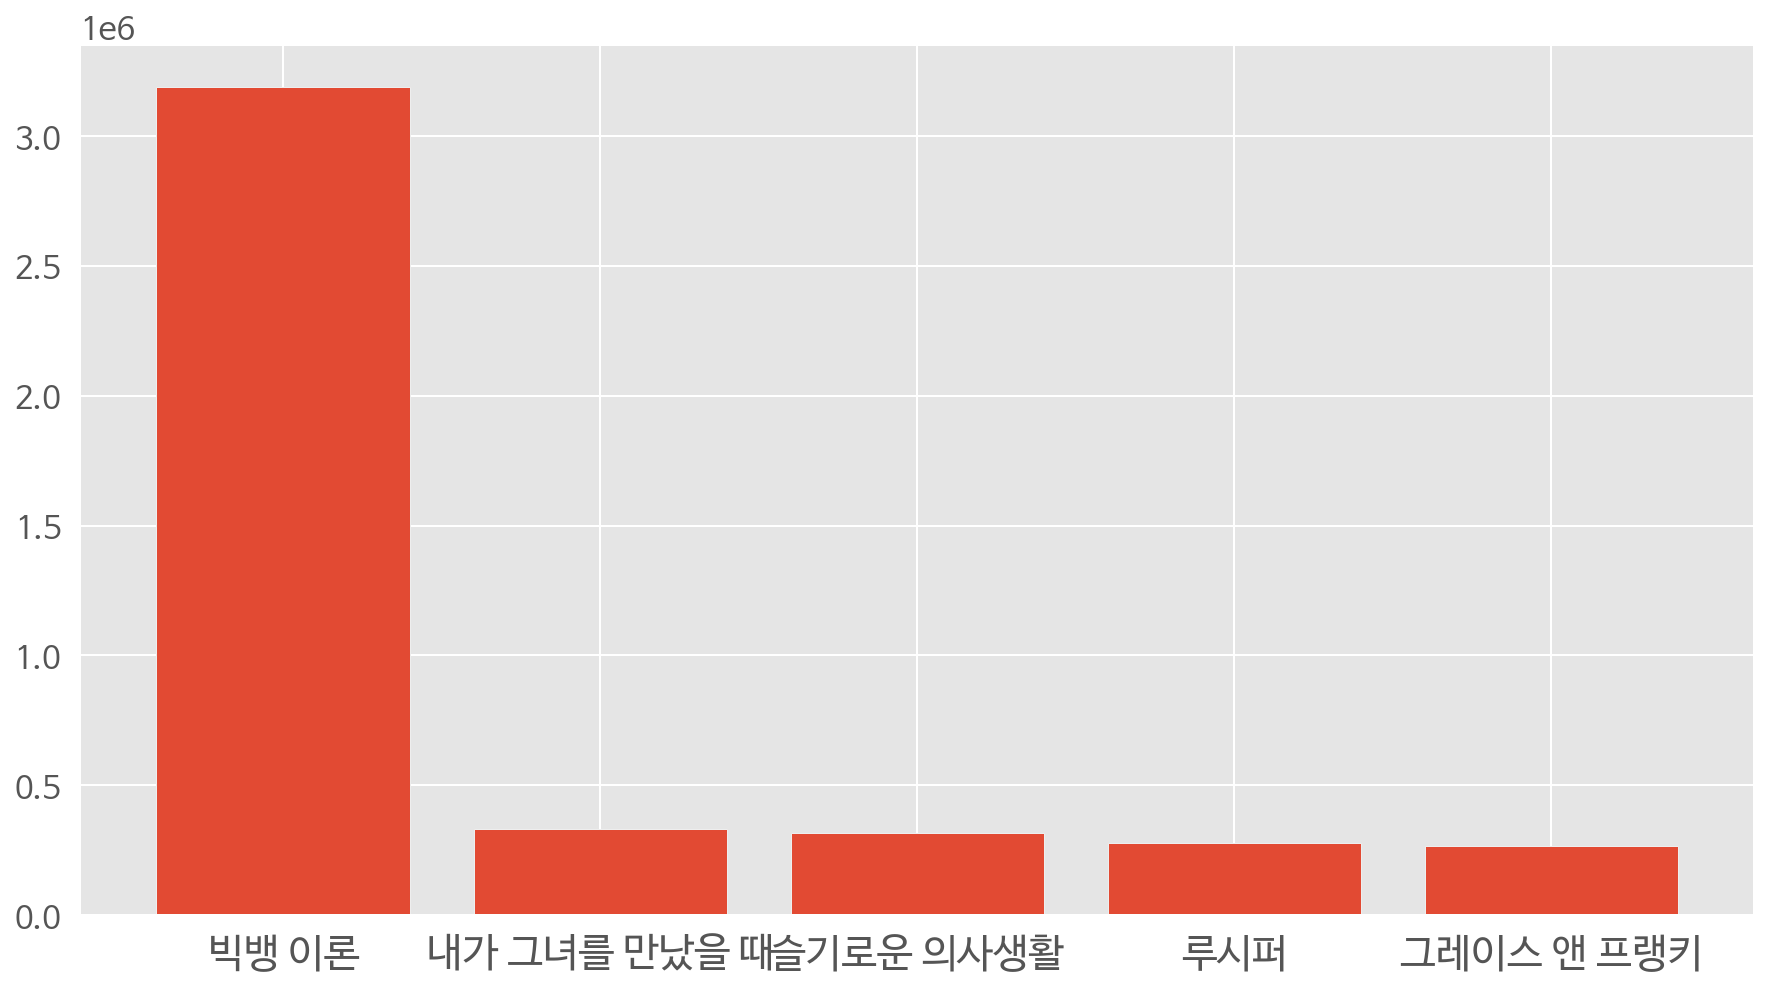

In [325]:
plt.bar(top5["title"], top5["total_duration_sec"])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=16)
plt.show()

### 분(시간단위)

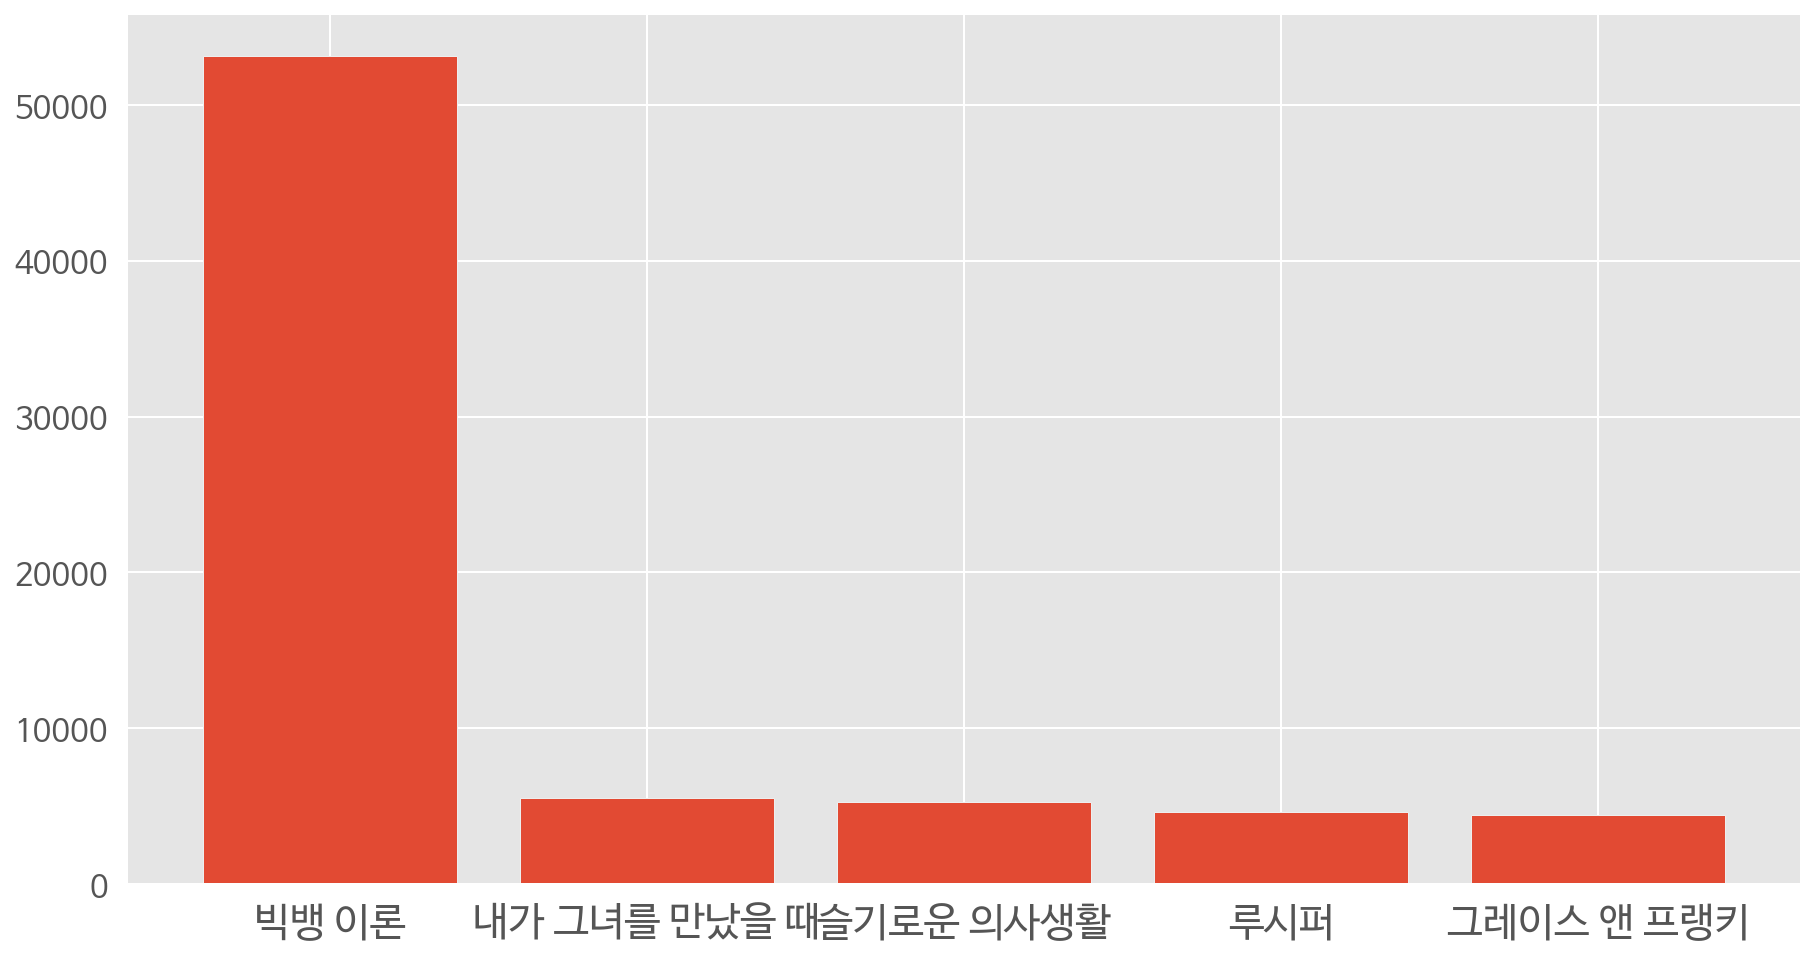

In [326]:
plt.bar(top5["title"], top5["total_duration_min"])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=16)
plt.show()

### 시(시간단위)

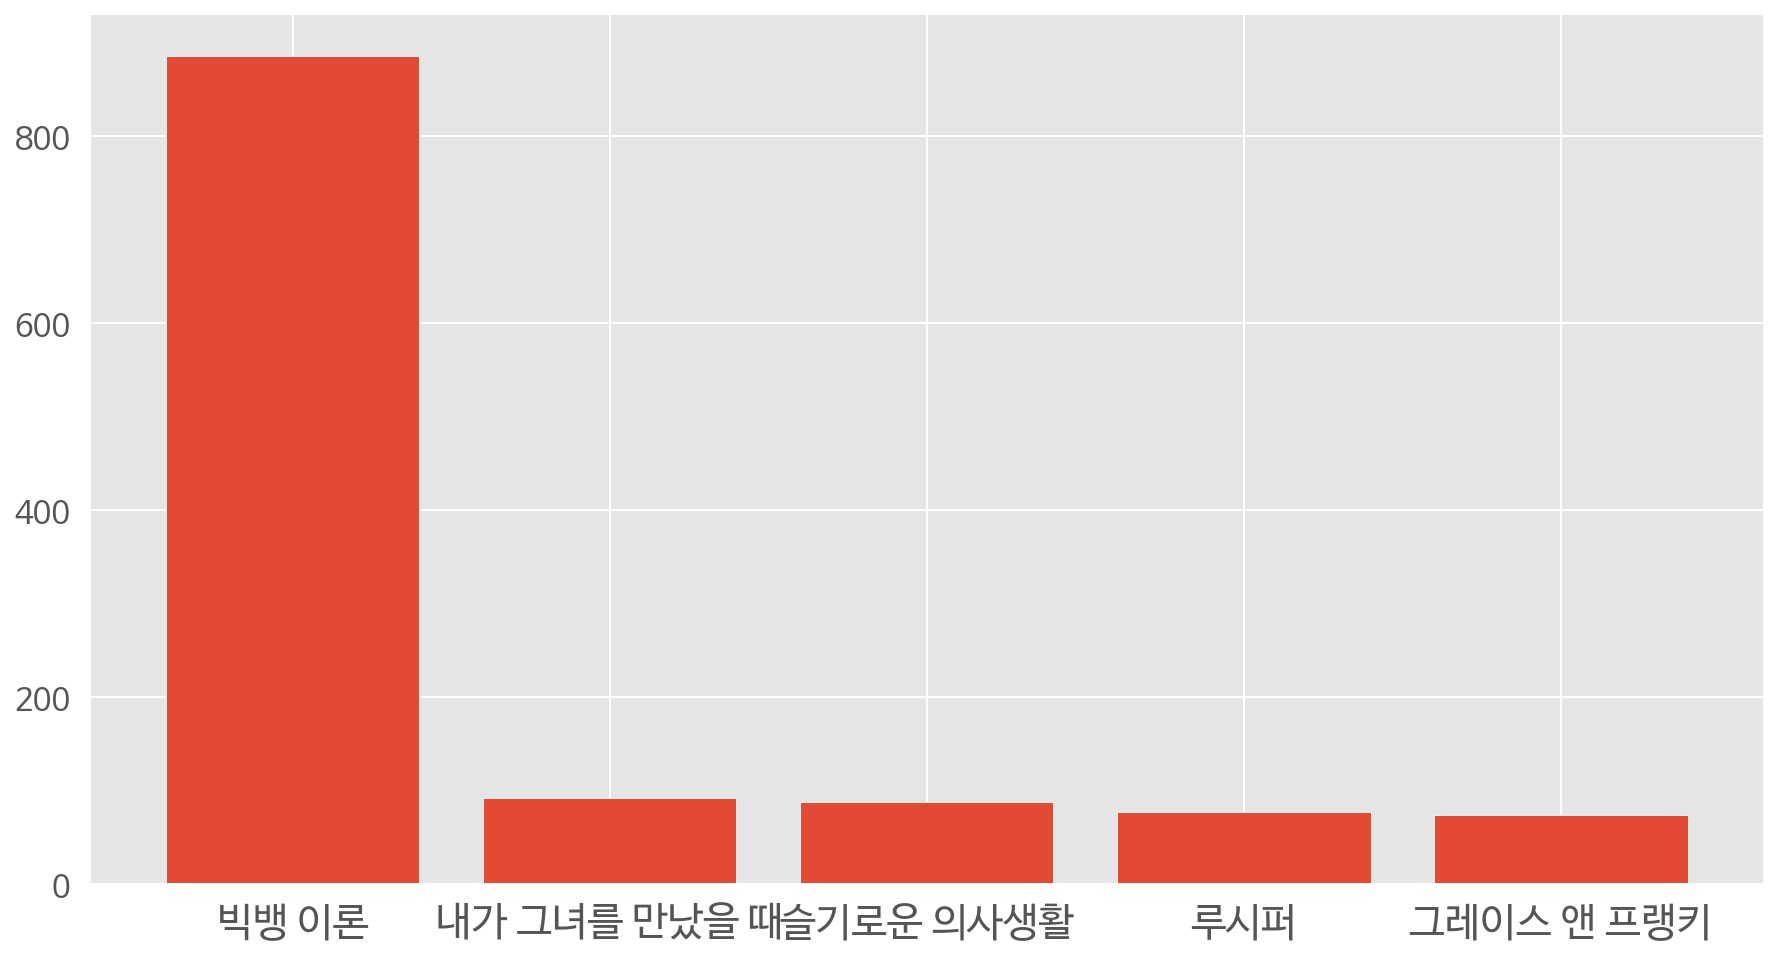

In [327]:
plt.bar(top5["title"], top5["total_duration_hour"])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=16)
plt.show()

# 3. 많이 본 영화 장르 Top5(중복값 허용 &  중복값 제거)
Radar chart

In [328]:
Netflix

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
0,guest,2021-05-31 02:25:20,00:00:05,Autoplayed: user action: None;,Move to Heaven: Season 1 (Hook 1),HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,"KR (Korea, Republic of)",...,5,31,Monday,2,25,20,00,00,05,5
1,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",...,5,30,Sunday,14,8,38,00,00,04,4
2,guest,2021-05-30 14:08:20,00:00:04,Autoplayed: user action: None;,Gatao - The Last Stray_hook_primary_16x9,HOOK,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",...,5,30,Sunday,14,8,20,00,00,04,4
3,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",...,5,30,Sunday,14,6,8,00,01,54,114
4,guest,2021-05-30 14:05:48,00:00:17,Autoplayed: user action: None;,시즌 2 (예고편): 자객 오육칠,TRAILER,Safari MAC (Cadmium),00:00:17,00:00:17,"KR (Korea, Republic of)",...,5,30,Sunday,14,5,48,00,00,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,4,25,19,00,00,23,23
19157,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,4,20,35,00,00,57,57
19158,김지은,2019-02-09 04:08:47,00:00:18,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:23,00:00:23,"KR (Korea, Republic of)",...,2,9,Saturday,4,8,47,00,00,18,18
19159,김지은,2019-02-09 03:10:57,00:00:11,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Apple iPhone X (GSM),00:00:11,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,3,10,57,00,00,11,11


## 예고편 제거

In [329]:
Netflix["Supplemental Video Type"].unique()

array(['HOOK', nan, 'TRAILER', 'TEASER_TRAILER', 'PREVIEW', 'RECAP',
       'CINEMAGRAPH', 'PROMOTIONAL', 'TUTORIAL', 'TAKE_OVER'],
      dtype=object)

In [330]:
no_trailer = Netflix[Netflix["Supplemental Video Type"].isnull()]
no_trailer = no_trailer.reset_index(drop=True)
no_trailer

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
0,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",...,5,30,Sunday,14,8,38,00,00,04,4
1,guest,2021-05-30 14:06:08,00:01:54,Autoplayed: user action: User_Interaction;,자객 오육칠: 시즌 1: 부자가 되는 법 (1화),NaN,Safari MAC (Cadmium),00:01:54,00:01:54,"KR (Korea, Republic of)",...,5,30,Sunday,14,6,8,00,01,54,114
2,guest,2021-05-30 12:46:21,00:47:35,NaN,라플라스의 마녀,NaN,Safari MAC (Cadmium),01:10:36,01:10:36,"KR (Korea, Republic of)",...,5,30,Sunday,12,46,21,00,47,35,2855
3,guest,2021-05-30 11:25:03,00:26:49,NaN,라플라스의 마녀,NaN,Safari MAC (Cadmium),00:26:49,Not latest view,"KR (Korea, Republic of)",...,5,30,Sunday,11,25,3,00,26,49,1609
4,guest,2020-09-28 08:51:09,00:41:18,Autoplayed: user action: None;,슬기로운 의사생활: 시즌 1: 5화 (5화),NaN,Safari MAC (Cadmium),00:41:28,00:41:28,"KR (Korea, Republic of)",...,9,28,Monday,8,51,9,00,41,18,2478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15346,김지은,2019-02-09 04:25:19,00:00:23,NaN,릭 앤 모티: 시즌 1: 파일럿 에피소드 (1화),NaN,Netflix Android STB L3 Android,00:00:23,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,4,25,19,00,00,23,23
15347,김지은,2019-02-09 04:20:35,00:00:57,NaN,오티스의 비밀 상담소: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:57,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,4,20,35,00,00,57,57
15348,김지은,2019-02-09 04:08:47,00:00:18,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Netflix Android STB L3 Android,00:00:23,00:00:23,"KR (Korea, Republic of)",...,2,9,Saturday,4,8,47,00,00,18,18
15349,김지은,2019-02-09 03:10:57,00:00:11,NaN,킹덤: 시즌 1: 1화 (1화),NaN,Apple iPhone X (GSM),00:00:11,Not latest view,"KR (Korea, Republic of)",...,2,9,Saturday,3,10,57,00,00,11,11


In [331]:
Movies= no_trailer.loc[~no_trailer["Title"].str.contains(": ")]
Movies = Movies .reset_index(drop=True)
Movies 

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
0,guest,2021-05-30 14:08:38,00:00:04,Autoplayed: user action: User_Interaction;,가질 수 없는 너,NaN,Safari MAC (Cadmium),00:00:04,00:00:04,"KR (Korea, Republic of)",...,5,30,Sunday,14,8,38,00,00,04,4
1,guest,2021-05-30 12:46:21,00:47:35,NaN,라플라스의 마녀,NaN,Safari MAC (Cadmium),01:10:36,01:10:36,"KR (Korea, Republic of)",...,5,30,Sunday,12,46,21,00,47,35,2855
2,guest,2021-05-30 11:25:03,00:26:49,NaN,라플라스의 마녀,NaN,Safari MAC (Cadmium),00:26:49,Not latest view,"KR (Korea, Republic of)",...,5,30,Sunday,11,25,3,00,26,49,1609
3,guest,2020-09-25 15:32:39,00:24:28,Autoplayed: user action: Unspecified;,키싱 부스 2,NaN,Safari MAC (Cadmium),00:24:28,00:24:28,"KR (Korea, Republic of)",...,9,25,Friday,15,32,39,00,24,28,1468
4,guest,2020-09-25 14:27:15,01:00:15,NaN,키싱 부스,NaN,Safari MAC (Cadmium),01:43:46,01:43:46,"KR (Korea, Republic of)",...,9,25,Friday,14,27,15,01,00,15,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,김지은,2019-05-26 19:59:01,00:04:05,Autoplayed: user action: Unspecified;,창의적인 뇌의 비밀,NaN,Safari MAC (Cadmium),00:07:32,Not latest view,"KR (Korea, Republic of)",...,5,26,Sunday,19,59,1,00,04,05,245
2129,김지은,2019-05-01 20:29:37,00:30:51,Autoplayed: user action: Unspecified;,섹스 앤 더 시티,NaN,Safari MAC (Cadmium),00:30:28,Not latest view,"KR (Korea, Republic of)",...,5,1,Wednesday,20,29,37,00,30,51,1851
2130,김지은,2019-05-01 11:08:43,01:43:47,Autoplayed: user action: Unspecified;,닥터 스트레인지,NaN,Safari MAC (Cadmium),01:44:57,01:44:57,"KR (Korea, Republic of)",...,5,1,Wednesday,11,8,43,01,43,47,2687
2131,김지은,2019-04-16 21:46:05,00:00:07,Autoplayed: user action: Unspecified;,첫 경험 훼방 작전,NaN,Safari MAC (Cadmium),00:04:49,00:04:49,"KR (Korea, Republic of)",...,4,16,Tuesday,21,46,5,00,00,07,7


In [332]:
Title_list = list(Movies["Title"])
Title_list

['가질 수 없는 너',
 '라플라스의 마녀',
 '라플라스의 마녀',
 '키싱 부스 2',
 '키싱 부스',
 '키싱 부스',
 '키싱 부스 2',
 '키싱 부스 2',
 '키싱 부스 2',
 '키싱 부스 2',
 '키싱 부스 2',
 '키싱 부스 2',
 '청설',
 '내가 사랑했던 모든 남자들에게',
 '키싱 부스',
 '내가 사랑했던 모든 남자들에게',
 '내가 사랑했던 모든 남자들에게',
 '사랑할 때 버려야 할 아까운 것들',
 '프린세스 다이어리 2',
 '프린세스 다이어리 2',
 '프린세스 다이어리 2',
 '내가 사랑했던 모든 남자들에게',
 '내가 사랑했던 모든 남자들에게',
 '내가 사랑했던 모든 남자들에게',
 '내가 사랑했던 모든 남자들에게',
 '내가 사랑했던 모든 남자들에게',
 '내가 사랑했던 모든 남자들에게',
 '라푼젤',
 '프린세스 다이어리',
 '내가 사랑했던 모든 남자들에게',
 '키싱 부스',
 '키싱 부스',
 '키싱 부스',
 '시에라 연애 대작전',
 '시에라 연애 대작전',
 '스텝 시스터스',
 '썸원 그레이트',
 '아메리칸 사이코',
 '도둑맞은 그 5년',
 '도둑맞은 그 5년',
 '도둑맞은 그 5년',
 '내가 사랑했던 모든 남자들에게',
 '내가 사랑했던 모든 남자들에게',
 '아메리칸 사이코',
 '도둑맞은 그 5년',
 '도둑맞은 그 5년',
 '도둑맞은 그 5년',
 '도둑맞은 그 5년',
 '도둑맞은 그 5년',
 '카페 소사이어티',
 '카페 소사이어티',
 '빅쇼트',
 '하우 투 비 싱글',
 '아이리시맨',
 '아이리시맨',
 '아이리시맨',
 '아이리시맨',
 '크리스마스에 기사가 올까요?',
 '아이리시맨을 말하다',
 '크리스마스에 기사가 올까요?',
 '터미널',
 '결혼 이야기',
 '결혼 이야기',
 '내가 사랑했던 모든 남자들에게',
 '배틀',
 '내가 사랑했던 모든 남자들에게',
 '슬리핑 위드 아더 피플',
 '상사에 대처하는 로맨틱한 자세',
 '상사에 대처하는 로

In [333]:
len(Title_list)

2133

## 중복 제거 X

In [334]:
import requests
import json
import ast

In [335]:
# genres_list = []
# for i in range(len(Title_list)):
#   multi_search_api = "https://api.themoviedb.org/3/search/multi?api_key=eac136b19bd53abf1ad95a1444efa985&language=ko&query=%s" %Title_list[i]
#   r = requests.get(multi_search_api)
#   data = json.loads(r.text)

#   genres_li = []
  
#   try:
#     result = data['results'][0]
#     if result is not None:
#       if (result['media_type'] =="movie"):
#         if  result['id'] is not None:
#           movie_id = int(result['id'])

#           movie_api = "https://api.themoviedb.org/3/movie/%d?api_key=eac136b19bd53abf1ad95a1444efa985&language=ko" %movie_id
#           r3 = requests.get(movie_api)
#           data3 = json.loads(r3.text)
#           genres2 = data3["genres"]
#           for k in range(len(genres2)):
#             genres_li.append(genres2[k].get('name'))
#       genres_list.append(genres_li)



#   except:
#     # genres_li.append(np.nan)
#     genres_li.append("없음")
#     genres_list.append(genres_li)

In [336]:
genres_list = []
for i in range(len(Title_list)):
  multi_search_api = "https://api.themoviedb.org/3/search/multi?api_key=eac136b19bd53abf1ad95a1444efa985&language=ko&query=%s" %Title_list[i]
  r = requests.get(multi_search_api)
  data = json.loads(r.text)

  genres_li = []
  
  try:
    result = data['results'][0]
    if result is not None:
      if (result['media_type'] =="movie"):
        movie_id = int(result['id'])

        movie_api = "https://api.themoviedb.org/3/movie/%d?api_key=eac136b19bd53abf1ad95a1444efa985&language=ko" %movie_id
        r3 = requests.get(movie_api)
        data3 = json.loads(r3.text)
        genres2 = data3["genres"]
        for k in range(len(genres2)):
          genres_li.append(genres2[k].get('name'))
    genres_list.append(genres_li)



  except:
    genres_li.append(np.nan)
    genres_list.append(genres_li)

In [337]:
genres_list

[['드라마'],
 ['미스터리', '범죄', 'SF'],
 ['미스터리', '범죄', 'SF'],
 ['코미디', '로맨스'],
 ['로맨스', '코미디'],
 ['로맨스', '코미디'],
 ['코미디', '로맨스'],
 ['코미디', '로맨스'],
 ['코미디', '로맨스'],
 ['코미디', '로맨스'],
 ['코미디', '로맨스'],
 ['코미디', '로맨스'],
 ['로맨스', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['드라마', '코미디', '로맨스'],
 ['코미디', '가족', '로맨스'],
 ['코미디', '가족', '로맨스'],
 ['코미디', '가족', '로맨스'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['애니메이션', '가족'],
 ['코미디', '가족', '로맨스'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디'],
 ['로맨스', '코미디'],
 ['로맨스', '코미디'],
 ['코미디', '드라마', '로맨스'],
 ['코미디', '드라마', '로맨스'],
 [nan],
 ['코미디', '로맨스'],
 ['공포', '스릴러'],
 [nan],
 [nan],
 [nan],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['공포', '스릴러'],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 ['코미디', '드라마', '로맨스'],
 ['코미디', '드라마', '로맨스'],
 [nan],
 ['코미디', '로맨스'],
 ['범죄', '드라마', '역사'],
 ['범죄', '드라마', '역사']

In [338]:
len(genres_list)

2133

In [339]:
genres = pd.DataFrame(genres_list, columns = ["genre1", "genre2", "genre3", "genre4", "genre5", "genre6"])
genres

,genre1,genre2,genre3,genre4,genre5,genre6
0,드라마,None,None,None,None,None
1,미스터리,범죄,SF,None,None,None
2,미스터리,범죄,SF,None,None,None
3,코미디,로맨스,None,None,None,None
4,로맨스,코미디,None,None,None,None
...,...,...,...,...,...,...
2128,다큐멘터리,None,None,None,None,None
2129,None,None,None,None,None,None
2130,액션,모험,판타지,SF,None,None
2131,NaN,None,None,None,None,None


In [340]:
len(genres)

2133

In [341]:
g1 = (genres["genre1"].value_counts())
g1

드라마      385
코미디      306
액션       173
스릴러      136
로맨스      129
다큐멘터리     90
범죄        85
애니메이션     79
모험        77
판타지       72
공포        60
SF        55
미스터리      30
가족        29
역사        12
전쟁         7
서부         6
음악         2
TV 영화      2
Name: genre1, dtype: int64

In [342]:
g1 =pd.DataFrame(genres["genre1"].value_counts())

In [343]:
g2 =pd.DataFrame(genres["genre2"].value_counts())
g2

,genre2
드라마,284
코미디,231
로맨스,145
액션,128
스릴러,98
모험,82
범죄,76
미스터리,57
애니메이션,56
판타지,53


In [344]:
g3 =pd.DataFrame(genres["genre3"].value_counts())
g3

,genre3
로맨스,106
스릴러,89
드라마,85
SF,75
모험,62
가족,56
코미디,52
판타지,50
범죄,46
역사,43


In [345]:
g4 =pd.DataFrame(genres["genre4"].value_counts())
g4

,genre4
스릴러,39
코미디,33
SF,31
판타지,29
미스터리,25
가족,14
모험,13
드라마,12
액션,11
공포,8


In [346]:
g5 =pd.DataFrame(genres["genre5"].value_counts())
g5

,genre5
판타지,8
역사,7
가족,6
범죄,6
드라마,5
코미디,5
서부,2
액션,2
스릴러,2
모험,1


In [347]:
g6 =pd.DataFrame(genres["genre6"].value_counts())
g6

,genre6
음악,5
로맨스,4
판타지,1


In [348]:
genre_total = pd.concat([g1,g2,g3,g4,g5,g6], axis=1)
genre_total

,genre1,genre2,genre3,genre4,genre5,genre6
드라마,385,284.0,85.0,12.0,5.0,NaN
코미디,306,231.0,52.0,33.0,5.0,NaN
액션,173,128.0,36.0,11.0,2.0,NaN
스릴러,136,98.0,89.0,39.0,2.0,NaN
로맨스,129,145.0,106.0,4.0,NaN,4.0
다큐멘터리,90,NaN,NaN,NaN,NaN,NaN
범죄,85,76.0,46.0,8.0,6.0,NaN
애니메이션,79,56.0,12.0,1.0,NaN,NaN
모험,77,82.0,62.0,13.0,1.0,NaN
판타지,72,53.0,50.0,29.0,8.0,1.0


In [349]:
genre_total["sum"] = genre_total.sum(axis=1)
genre_total.reset_index().rename(columns={"index":"genre"})

,genre,genre1,genre2,genre3,genre4,genre5,genre6,sum
0,드라마,385,284.0,85.0,12.0,5.0,NaN,771.0
1,코미디,306,231.0,52.0,33.0,5.0,NaN,627.0
2,액션,173,128.0,36.0,11.0,2.0,NaN,350.0
3,스릴러,136,98.0,89.0,39.0,2.0,NaN,364.0
4,로맨스,129,145.0,106.0,4.0,NaN,4.0,388.0
5,다큐멘터리,90,NaN,NaN,NaN,NaN,NaN,90.0
6,범죄,85,76.0,46.0,8.0,6.0,NaN,221.0
7,애니메이션,79,56.0,12.0,1.0,NaN,NaN,148.0
8,모험,77,82.0,62.0,13.0,1.0,NaN,235.0
9,판타지,72,53.0,50.0,29.0,8.0,1.0,213.0


In [350]:
genre_total = genre_total.sort_values(by=["sum"],ascending=False)
genre_total

,genre1,genre2,genre3,genre4,genre5,genre6,sum
드라마,385,284.0,85.0,12.0,5.0,NaN,771.0
코미디,306,231.0,52.0,33.0,5.0,NaN,627.0
로맨스,129,145.0,106.0,4.0,NaN,4.0,388.0
스릴러,136,98.0,89.0,39.0,2.0,NaN,364.0
액션,173,128.0,36.0,11.0,2.0,NaN,350.0
모험,77,82.0,62.0,13.0,1.0,NaN,235.0
범죄,85,76.0,46.0,8.0,6.0,NaN,221.0
판타지,72,53.0,50.0,29.0,8.0,1.0,213.0
SF,55,42.0,75.0,31.0,NaN,NaN,203.0
애니메이션,79,56.0,12.0,1.0,NaN,NaN,148.0


### Top5 추출

In [351]:
top5 = genre_total.iloc[:5]
top5 = top5.reset_index()
top5 = top5.fillna(value =0)
top5

,index,genre1,genre2,genre3,genre4,genre5,genre6,sum
0,드라마,385,284.0,85.0,12.0,5.0,0.0,771.0
1,코미디,306,231.0,52.0,33.0,5.0,0.0,627.0
2,로맨스,129,145.0,106.0,4.0,0.0,4.0,388.0
3,스릴러,136,98.0,89.0,39.0,2.0,0.0,364.0
4,액션,173,128.0,36.0,11.0,2.0,0.0,350.0


### Radar chart

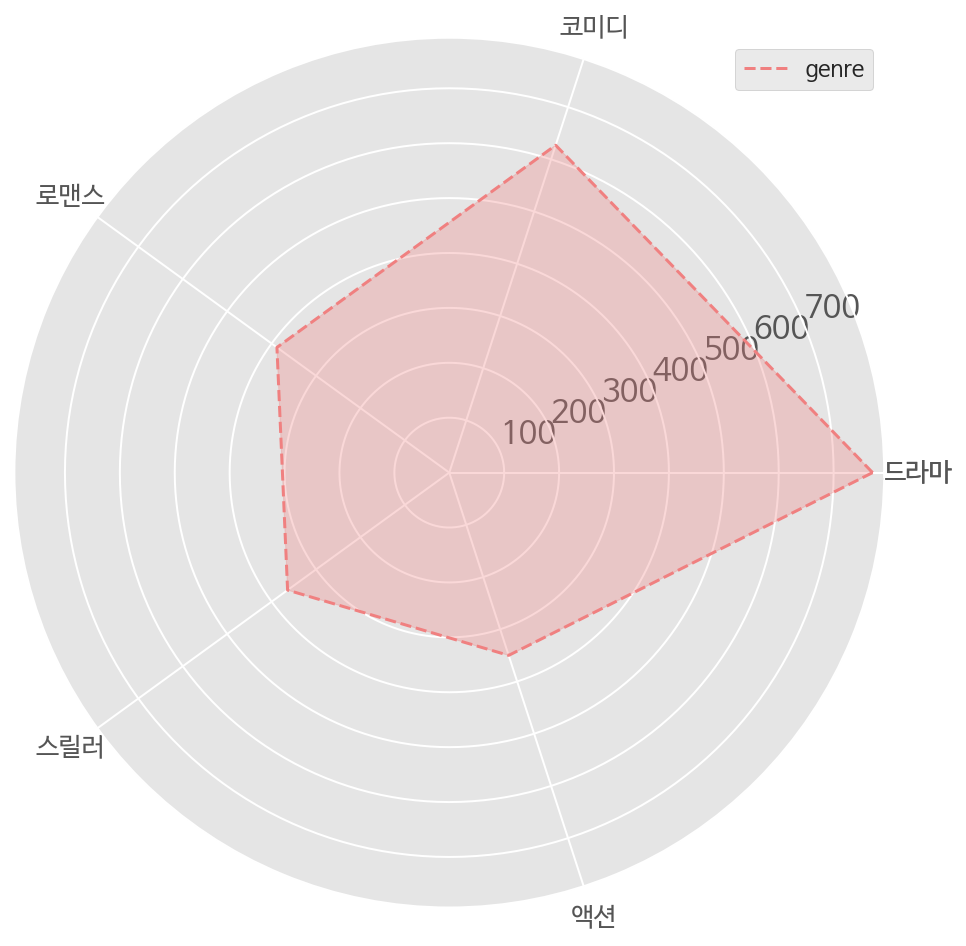

In [352]:
categories = top5["index"]
categories = [*categories, categories[0]]

top5_sum = top5["sum"]
sum = [*top5_sum, top5_sum[0]]


label_loc = np.linspace(start=0, stop=2*np.pi, num=len(sum))


plt.figure(figsize=(8,8))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)
ax.plot(label_loc, sum, label='genre', linestyle='dashed', color='lightcoral')
ax.fill(label_loc, sum, color='lightcoral', alpha=0.3)
ax.legend()
plt.show()

## 중복 제거
같은 년, 월, 일 경우만 하나로 통일

In [353]:
Movies_no_duple = Movies[Movies .duplicated(["Title", "Year", "Month", "Day"], keep=False)]
Movies_no_duple

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Month,Day,Day_name,Hour,Minute,Second,Duration_hour,Duration_min,Duration_sec,Duration_sec_sum
1,guest,2021-05-30 12:46:21,00:47:35,NaN,라플라스의 마녀,NaN,Safari MAC (Cadmium),01:10:36,01:10:36,"KR (Korea, Republic of)",...,5,30,Sunday,12,46,21,00,47,35,2855
2,guest,2021-05-30 11:25:03,00:26:49,NaN,라플라스의 마녀,NaN,Safari MAC (Cadmium),00:26:49,Not latest view,"KR (Korea, Republic of)",...,5,30,Sunday,11,25,3,00,26,49,1609
3,guest,2020-09-25 15:32:39,00:24:28,Autoplayed: user action: Unspecified;,키싱 부스 2,NaN,Safari MAC (Cadmium),00:24:28,00:24:28,"KR (Korea, Republic of)",...,9,25,Friday,15,32,39,00,24,28,1468
4,guest,2020-09-25 14:27:15,01:00:15,NaN,키싱 부스,NaN,Safari MAC (Cadmium),01:43:46,01:43:46,"KR (Korea, Republic of)",...,9,25,Friday,14,27,15,01,00,15,75
5,guest,2020-09-25 11:30:51,00:43:31,Autoplayed: user action: None;,키싱 부스,NaN,Safari MAC (Cadmium),00:43:31,Not latest view,"KR (Korea, Republic of)",...,9,25,Friday,11,30,51,00,43,31,2611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,김지은,2020-01-05 14:43:13,00:13:53,NaN,씨스터액트,NaN,Safari MAC (Cadmium),00:45:32,Not latest view,"KR (Korea, Republic of)",...,1,5,Sunday,14,43,13,00,13,53,833
2108,김지은,2020-01-05 11:41:16,00:13:27,NaN,씨스터액트,NaN,Safari MAC (Cadmium),00:26:32,Not latest view,"KR (Korea, Republic of)",...,1,5,Sunday,11,41,16,00,13,27,807
2109,김지은,2020-01-05 11:27:35,00:13:05,NaN,씨스터액트,NaN,Safari MAC (Cadmium),00:13:05,Not latest view,"KR (Korea, Republic of)",...,1,5,Sunday,11,27,35,00,13,05,785
2116,김지은,2019-09-21 08:46:40,00:46:52,NaN,톨 걸,NaN,Apple iPhone 6s,01:38:47,01:38:47,"KR (Korea, Republic of)",...,9,21,Saturday,8,46,40,00,46,52,2812


In [354]:
len(Movies_no_duple)

1032

In [355]:
Title_list= list(Movies_no_duple["Title"])

In [356]:
import requests
import json
import ast

In [357]:
genres_list = []
for i in range(len(Title_list)):
  multi_search_api = "https://api.themoviedb.org/3/search/multi?api_key=eac136b19bd53abf1ad95a1444efa985&language=ko&query=%s" %Title_list[i]
  r = requests.get(multi_search_api)
  data = json.loads(r.text)

  genres_li = []
  
  try:
    result = data['results'][0]
    if result is not None:
      if (result['media_type'] =="movie"):
        movie_id = int(result['id'])

        movie_api = "https://api.themoviedb.org/3/movie/%d?api_key=eac136b19bd53abf1ad95a1444efa985&language=ko" %movie_id
        r3 = requests.get(movie_api)
        data3 = json.loads(r3.text)
        genres2 = data3["genres"]
        for k in range(len(genres2)):
          genres_li.append(genres2[k].get('name'))
    genres_list.append(genres_li)



  except:
    genres_li.append(np.nan)
    genres_list.append(genres_li)

In [358]:
genres_list

[['미스터리', '범죄', 'SF'],
 ['미스터리', '범죄', 'SF'],
 ['코미디', '로맨스'],
 ['로맨스', '코미디'],
 ['로맨스', '코미디'],
 ['코미디', '로맨스'],
 ['코미디', '로맨스'],
 ['코미디', '로맨스'],
 ['코미디', '로맨스'],
 ['코미디', '가족', '로맨스'],
 ['코미디', '가족', '로맨스'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디'],
 ['로맨스', '코미디'],
 ['코미디', '드라마', '로맨스'],
 ['코미디', '드라마', '로맨스'],
 [nan],
 [nan],
 [nan],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 ['코미디', '드라마', '로맨스'],
 ['코미디', '드라마', '로맨스'],
 ['범죄', '드라마', '역사'],
 ['범죄', '드라마', '역사'],
 ['코미디', '로맨스'],
 ['코미디', '로맨스'],
 [],
 [],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디'],
 ['로맨스', '코미디'],
 ['코미디', '로맨스'],
 ['코미디', '로맨스'],
 ['판타지', '코미디', '로맨스'],
 ['판타지', '코미디', '로맨스'],
 ['로맨스', '코미디'],
 ['로맨스', '코미디'],
 ['로맨스', '코미디', '드라마'],
 ['로맨스', '코미디', '드라마'],
 ['코미디', '드라마', 'SF'],
 ['범죄', '액션', '드라마'],
 ['범죄', '액션', '드라마'],
 [

In [359]:
len(genres_list)

1032

In [360]:
genres = pd.DataFrame(genres_list, columns = ["genre1", "genre2", "genre3", "genre4", "genre5", "genre6"])
genres

,genre1,genre2,genre3,genre4,genre5,genre6
0,미스터리,범죄,SF,None,None,None
1,미스터리,범죄,SF,None,None,None
2,코미디,로맨스,None,None,None,None
3,로맨스,코미디,None,None,None,None
4,로맨스,코미디,None,None,None,None
...,...,...,...,...,...,...
1027,NaN,None,None,None,None,None
1028,NaN,None,None,None,None,None
1029,NaN,None,None,None,None,None
1030,코미디,드라마,로맨스,None,None,None


In [361]:
len(genres)

1032

In [362]:
g1 = (genres["genre1"].value_counts())


In [363]:
g1 =pd.DataFrame(genres["genre1"].value_counts())

In [364]:
g2 =pd.DataFrame(genres["genre2"].value_counts())


In [365]:
g3 =pd.DataFrame(genres["genre3"].value_counts())


In [366]:
g4 =pd.DataFrame(genres["genre4"].value_counts())


In [367]:
g5 =pd.DataFrame(genres["genre5"].value_counts())


In [368]:
g6 =pd.DataFrame(genres["genre6"].value_counts())


In [369]:
genre_total = pd.concat([g1,g2,g3,g4,g5,g6], axis=1)
genre_total

,genre1,genre2,genre3,genre4,genre5,genre6
드라마,165.0,98.0,45.0,6.0,3.0,NaN
코미디,146.0,118.0,15.0,12.0,NaN,NaN
액션,85.0,75.0,19.0,8.0,NaN,NaN
스릴러,65.0,58.0,43.0,17.0,NaN,NaN
로맨스,51.0,51.0,36.0,2.0,NaN,2.0
다큐멘터리,44.0,NaN,NaN,NaN,NaN,NaN
범죄,41.0,40.0,26.0,4.0,5.0,NaN
SF,39.0,29.0,50.0,12.0,NaN,NaN
애니메이션,34.0,17.0,4.0,NaN,NaN,NaN
모험,33.0,43.0,36.0,4.0,NaN,NaN


In [370]:
genre_total["sum"] = genre_total.sum(axis=1)
genre_total.reset_index().rename(columns={"index":"genre"})

,genre,genre1,genre2,genre3,genre4,genre5,genre6,sum
0,드라마,165.0,98.0,45.0,6.0,3.0,NaN,317.0
1,코미디,146.0,118.0,15.0,12.0,NaN,NaN,291.0
2,액션,85.0,75.0,19.0,8.0,NaN,NaN,187.0
3,스릴러,65.0,58.0,43.0,17.0,NaN,NaN,183.0
4,로맨스,51.0,51.0,36.0,2.0,NaN,2.0,142.0
5,다큐멘터리,44.0,NaN,NaN,NaN,NaN,NaN,44.0
6,범죄,41.0,40.0,26.0,4.0,5.0,NaN,116.0
7,SF,39.0,29.0,50.0,12.0,NaN,NaN,130.0
8,애니메이션,34.0,17.0,4.0,NaN,NaN,NaN,55.0
9,모험,33.0,43.0,36.0,4.0,NaN,NaN,116.0


In [371]:
genre_total = genre_total.sort_values(by=["sum"],ascending=False)
genre_total

,genre1,genre2,genre3,genre4,genre5,genre6,sum
드라마,165.0,98.0,45.0,6.0,3.0,NaN,317.0
코미디,146.0,118.0,15.0,12.0,NaN,NaN,291.0
액션,85.0,75.0,19.0,8.0,NaN,NaN,187.0
스릴러,65.0,58.0,43.0,17.0,NaN,NaN,183.0
로맨스,51.0,51.0,36.0,2.0,NaN,2.0,142.0
SF,39.0,29.0,50.0,12.0,NaN,NaN,130.0
모험,33.0,43.0,36.0,4.0,NaN,NaN,116.0
범죄,41.0,40.0,26.0,4.0,5.0,NaN,116.0
판타지,27.0,28.0,20.0,9.0,4.0,NaN,88.0
미스터리,17.0,35.0,18.0,14.0,NaN,NaN,84.0


### Top5 추출

In [372]:
top5 = genre_total.iloc[:5]
top5 = top5.reset_index()
top5 = top5.fillna(value =0)
top5

,index,genre1,genre2,genre3,genre4,genre5,genre6,sum
0,드라마,165.0,98.0,45.0,6.0,3.0,0.0,317.0
1,코미디,146.0,118.0,15.0,12.0,0.0,0.0,291.0
2,액션,85.0,75.0,19.0,8.0,0.0,0.0,187.0
3,스릴러,65.0,58.0,43.0,17.0,0.0,0.0,183.0
4,로맨스,51.0,51.0,36.0,2.0,0.0,2.0,142.0


### Radar chart

https://blog.naver.com/breezehome50/222305541524 참고

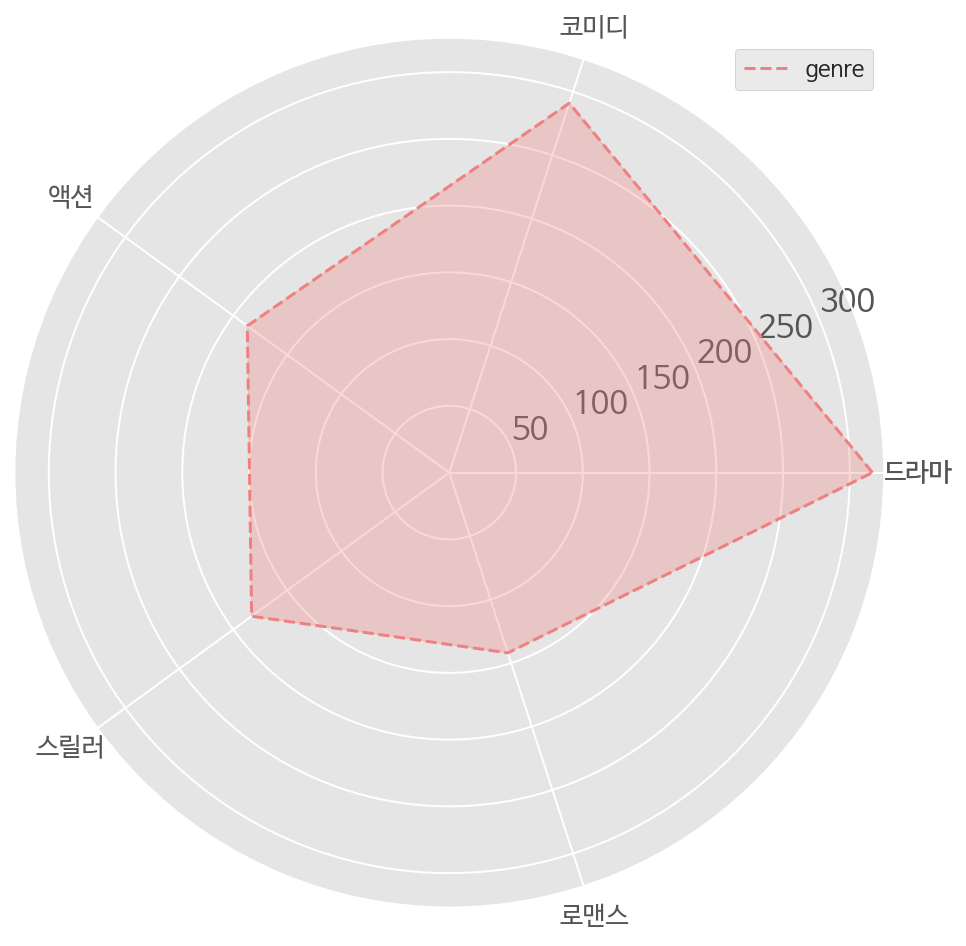

In [373]:
categories = top5["index"]
categories = [*categories, categories[0]]

top5_sum = top5["sum"]
sum = [*top5_sum, top5_sum[0]]


label_loc = np.linspace(start=0, stop=2*np.pi, num=len(sum))


plt.figure(figsize=(8,8))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)
ax.plot(label_loc, sum, label='genre', linestyle='dashed', color='lightcoral')
ax.fill(label_loc, sum, color='lightcoral', alpha=0.3)
ax.legend()
plt.show()